### 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。
左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。標高と距離の単位はメートルです。300地点のデータです。

In [1]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

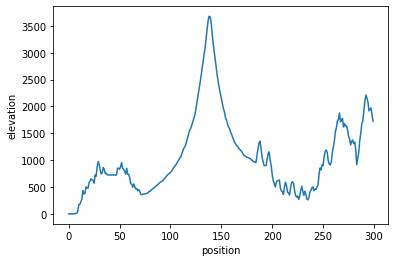

In [4]:
position = np.array(fuji[:,0])
elevation = np.array(fuji[:,3])

plt.xlabel('position')
plt.ylabel('elevation')
plt.plot(position, elevation)
plt.show

### 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [5]:
dx = position[1:] - position[:-1]
dy = elevation[1:] -elevation[:-1]

a = dy / dx
print(a)

[   0.      0.      0.      0.      0.      6.62    0.59    4.99   42.21
  117.15    6.28   50.37   47.17  158.38  -62.02    8.32  123.34  -18.01
   -7.57  102.68   30.42   44.04  -26.74   -1.58  -54.09  151.4   -22.01
  177.53   96.7   -57.01 -102.16  -73.94   27.86   93.14  -37.54  -78.13
    7.72  -31.61    0.      0.      0.      0.      0.      0.      0.
    0.      0.    127.68   -0.82  -20.36   49.44   74.7  -105.62  -17.92
  -41.59  -51.04  109.86 -110.53   -1.82  -64.24 -108.22  -11.79  -54.82
   60.87  -55.26  -40.69    7.33  -40.17   24.72  -41.94  -49.98   -6.61
   13.23    2.13    0.15    6.43    9.02    3.5    28.27    2.19   22.4
   15.66   13.16   16.58   16.7    14.44   17.     17.1    21.43   13.92
   13.37   10.68   18.67   28.72   11.93   27.79   25.57   15.45   12.51
   18.9    22.67   22.37   41.     25.27   26.61   22.24   40.58   26.92
   34.1    25.35   46.11   60.78   53.28   20.11   52.55   67.58   69.65
   76.91   55.28   36.42   61.07   67.07   55.48   68.

In [6]:
# # 修正前
# def koubai(x,y):
#     dx = x[1:] -x[:-1]
#     dy = y[1:] - y[:-1]

#     a = dy / dx
#     return a
    
# gradient = koubai(0, elevation)

In [7]:
# 修正後
def koubai(position_now):
    if position_now == 0:
        print("0は無効な入力です。")
        return
    
    dx = position[position_now] - position[position_now - 1]
    dy = elevation[position_now] - elevation[position_now - 1]

    a = dy / dx
    return a
    
gradient = koubai(1)
print(gradient)

0.0


### 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと 「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」 となります。


「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。$\alpha$ は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。


《実装上の注意》

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

《ハイパーパラメータとは》

機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [8]:
ALPHA = 0.2

In [9]:
from decimal import Decimal, ROUND_HALF_UP

def compute_next_position(position_now):
    
    position_now = int(position_now)
    
    if position_now == 0:
        print("0は無効な入力です。")
        return
    
    gradient = koubai(position_now)
    
    next_position = position_now - ALPHA * gradient
    
    if next_position <= 0:
        print("取り得ない値です。(next_position:{})".format(next_position))
        print("1をリターンします。")
        return 1
    elif next_position > max(position):
        print("取り得ない値です。(next_position:{})".format(next_position))
        print("{}をリターンします。".format(int(max(position))))
        return int(max(position))
    
    return int(Decimal(str(next_position)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))

In [10]:
compute_next_position(102)

98

### 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

In [11]:
def kudari(position_now):
    
    if position_now == 0:
        print("0は無効な入力です。")
        return
    
    position_now = int(position_now)
    
    lst = []
    lst.append(position_now)
    position_next = compute_next_position(lst[-1])
    
    while position_next not in lst:
        lst.append(position_next)
        position_next = compute_next_position(lst[-1])
    
    return lst

In [12]:
position_kudari = kudari(136)
print(position_kudari)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


In [13]:
print(koubai(75))

0.14999999999997726


### 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

<function matplotlib.pyplot.show(*args, **kw)>

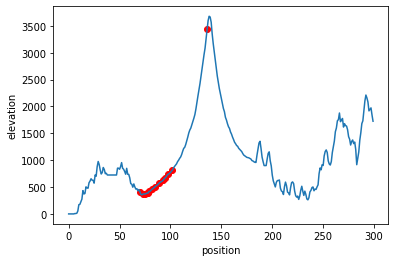

In [14]:
elevation_kudari = [elevation[position] for position in position_kudari]

plt.xlabel('position')
plt.ylabel('elevation')
plt.plot(position, elevation)
plt.scatter(position_kudari, elevation_kudari, c="red")
plt.show

### 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

《初期値とは》
今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

In [15]:
list_all_kudari_position = []

for position_now in position:
    if position_now == 0:
        continue
    print("計算中…position_now:{}".format(int(position_now)))
    list_all_kudari_position.append(kudari(position_now))


計算中…position_now:1
計算中…position_now:2
計算中…position_now:3
計算中…position_now:4
計算中…position_now:5
計算中…position_now:6
計算中…position_now:7
計算中…position_now:8
計算中…position_now:9
計算中…position_now:10
取り得ない値です。(next_position:-13.430000000000003)
1をリターンします。
計算中…position_now:11
取り得ない値です。(next_position:-13.430000000000003)
1をリターンします。
計算中…position_now:12
計算中…position_now:13
計算中…position_now:14
取り得ない値です。(next_position:-17.676000000000002)
1をリターンします。
計算中…position_now:15
計算中…position_now:16
取り得ない値です。(next_position:-17.676000000000002)
1をリターンします。
計算中…position_now:17
取り得ない値です。(next_position:-7.667999999999996)
1をリターンします。
計算中…position_now:18
計算中…position_now:19
計算中…position_now:20
取り得ない値です。(next_position:-0.5360000000000014)
1をリターンします。
計算中…position_now:21
計算中…position_now:22
計算中…position_now:23
取り得ない値です。(next_position:-7.505999999999993)
1をリターンします。
計算中…position_now:24
計算中…position_now:25
計算中…position_now:26
取り得ない値です。(next_position:-4.280000000000019)
1をリターンします。
計算中…position_now:27
計算中…position_now:28
取り得な

In [16]:
list_all_kudari_position

[[1],
 [2],
 [3],
 [4],
 [5],
 [6, 5],
 [7],
 [8, 7],
 [9, 1],
 [10, 1],
 [11, 10, 1],
 [12, 2],
 [13, 4],
 [14, 1],
 [15, 27, 31, 51, 41],
 [16, 14, 1],
 [17, 1],
 [18, 22, 13, 4],
 [19, 21, 15, 27, 31, 51, 41],
 [20, 1],
 [21, 15, 27, 31, 51, 41],
 [22, 13, 4],
 [23, 28, 1],
 [24],
 [25, 36, 52, 37, 35, 43],
 [26, 1],
 [27, 31, 51, 41],
 [28, 1],
 [29, 10, 1],
 [30, 41],
 [31, 51, 41],
 [32, 47],
 [33, 27, 31, 51, 41],
 [34, 15, 27, 31, 51, 41],
 [35, 43],
 [36, 52, 37, 35, 43],
 [37, 35, 43],
 [38, 44],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48, 22, 13, 4],
 [49],
 [50, 54, 58, 80],
 [51, 41],
 [52, 37, 35, 43],
 [53, 74],
 [54, 58, 80],
 [55, 63, 74],
 [56, 66, 74],
 [57, 35, 43],
 [58, 80],
 [59],
 [60, 73, 70, 78, 77, 75],
 [61, 83, 80],
 [62, 64, 52, 37, 35, 43],
 [63, 74],
 [64, 52, 37, 35, 43],
 [65, 76, 75],
 [66, 74],
 [67, 66, 74],
 [68, 76, 75],
 [69, 64, 52, 37, 35, 43],
 [70, 78, 77, 75],
 [71, 81, 77, 75],
 [72, 73, 70, 78, 77, 75],
 [73, 70, 7

In [17]:
list_test_kudari = [136, 140, 188, 266, 290]

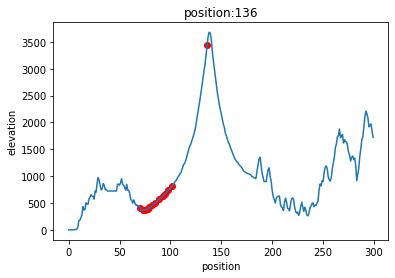

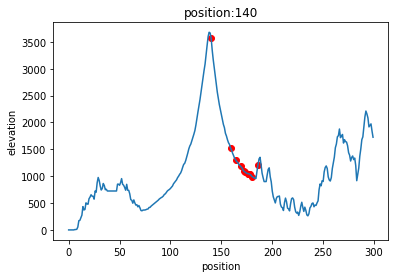

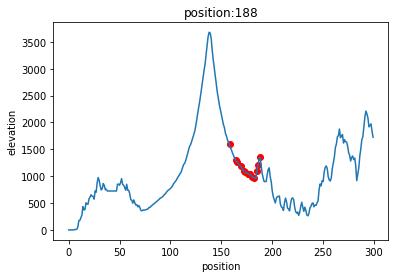

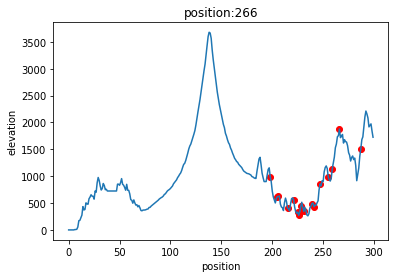

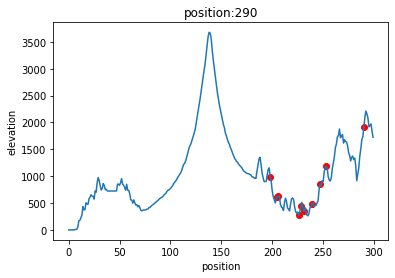

In [18]:
ALPHA = 0.2

for position_now in list_test_kudari:
    kudari_position = kudari(position_now)
    elevation_kudari = [elevation[position_] for position_ in kudari_position]

#     # デバッグ用
#     print("kudari_position:{}".format(len(kudari_position)))
#     print("elevation_kudari:{}".format(len(elevation_kudari)))
    
    fig = plt.figure()
    ax = fig.subplots()
    plt.title("position:{}".format(position_now))
    plt.xlabel('position')
    plt.ylabel('elevation')
    ax.plot(position, elevation)
    ax.scatter(kudari_position, elevation_kudari, c="red")

### 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ $\alpha$ を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

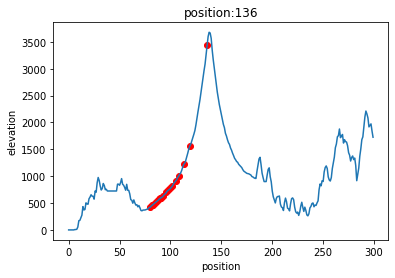

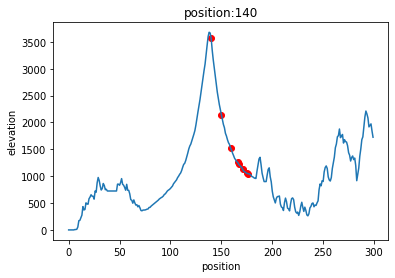

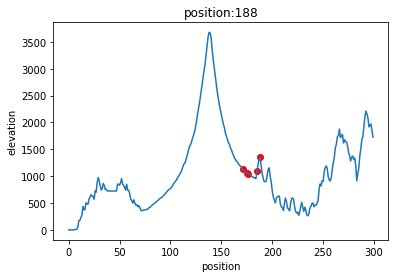

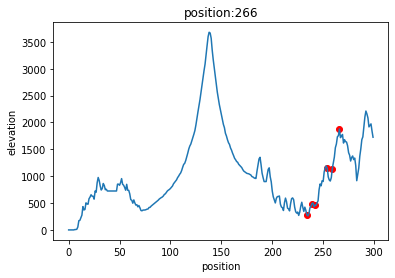

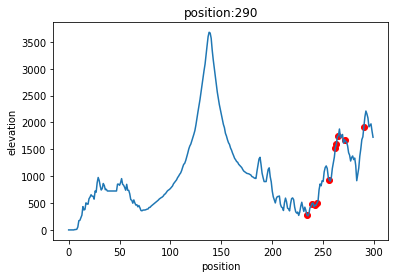

In [19]:
ALPHA = 0.1

for position_now in list_test_kudari:
    kudari_position = kudari(position_now)
    elevation_kudari = [elevation[position_] for position_ in kudari_position]

#     # デバッグ用
#     print("kudari_position:{}".format(len(kudari_position)))
#     print("elevation_kudari:{}".format(len(elevation_kudari)))
    
    fig = plt.figure()
    ax = fig.subplots()
    plt.title("position:{}".format(position_now))
    plt.xlabel('position')
    plt.ylabel('elevation')
    ax.plot(position, elevation)
    ax.scatter(kudari_position, elevation_kudari, c="red")

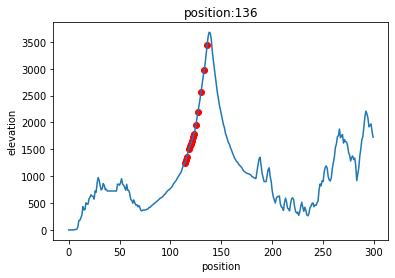

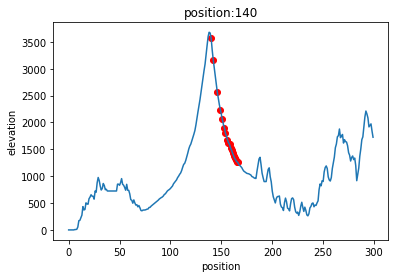

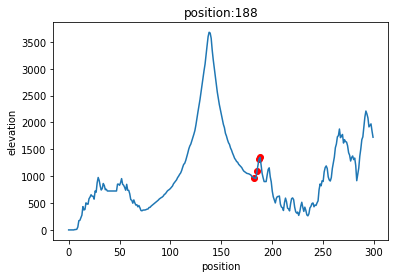

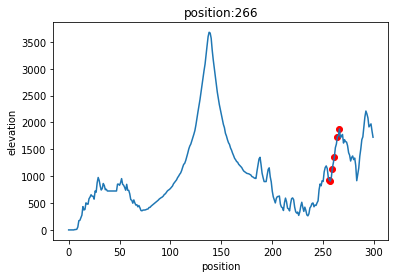

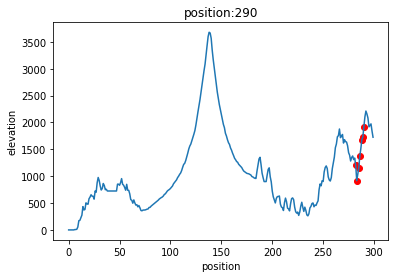

In [23]:
ALPHA = 0.02

for position_now in list_test_kudari:
    kudari_position = kudari(position_now)
    elevation_kudari = [elevation[position_] for position_ in kudari_position]

#     # デバッグ用
#     print("kudari_position:{}".format(len(kudari_position)))
#     print("elevation_kudari:{}".format(len(elevation_kudari)))
    
    fig = plt.figure()
    ax = fig.subplots()
    plt.title("position:{}".format(position_now))
    plt.xlabel('position')
    plt.ylabel('elevation')
    ax.plot(position, elevation)
    ax.scatter(kudari_position, elevation_kudari, c="red")

#### 結果からわかること

- ハイパーパラメータが小さいほど勾配による位置更新の影響が小さく、収束しやすい。
- 収束しやすいため、勾配の途中で計算が終わってしまうこともある。